<a href="https://colab.research.google.com/github/nicolegold/PreverNotasENEM2016/blob/master/edicaofinal_Enem2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Codenation
Crie um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016

## Importando as bibliotecas que serão utilizados

In [0]:
import numpy as np
import pandas as pd 
from sklearn import metrics

*   Biblioteca NumPy: biblioteca para computação científica. Fornece um grande conjunto de funções e operações matemáticas. Permite executar grandes cálculos em uma única linha de código. Aqui nós importamos a biblioteca NumPy usando import numpy as np. É uma forma de importar a biblioteca e assim nomear ela como np.
*   Biblioteca Pandas: fornece estruturas e ferramentas de análise de dados. Aqui nós importamos a biblioteca Pandas usando import pandas as pd. Nesse caso nomeamos a biblioteca como pd. Usaremos pd.read_csv para ler arquivos .csv. CSV, ou comma-separated values é um formato muito comum de dados abertos, trata-se, como a sigla sugere, de valores divididos por vírgula, apesar de o caracter separador poder ser o ponto-e-vírgula ou outro.
*   Biblioteca scikit-learn: possui algoritmos de aprendizado de máquina (machine learning) de código aberto. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy. Aqui nós iremos importar todas as métricas do scikit.



## Fazendo a leitura e importação dos datasets 

In [0]:
df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" ) 
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )
df_resposta = pd.DataFrame() #DataFrame é uma estrutura bidimensional de dados, como uma planilha. Aqui estamos criando um dataframe que irá conter a resposta final,
# ou seja, as notas da prova de matemática de quem participou do ENEM 2016

train.csv é o arquivo a ser importado;

O argumento da função sep, que por padrão é a vírgula, mas que pode ser definido como outro caractere caso seu dado esteja usando outro separador; 

O parâmetro encoding é uma str e é opcional. Tem como função usar o UTF (Unicode Transformation Format / Unicode) para ler/gravar. Unicode é um padrão que permite aos computadores representar e manipular, de forma consistente, texto de qualquer sistema de escrita existente. Nesse caso, o UTF-8 é um tipo de codificação binária de comprimento variável, que pode representar qualquer caracter universal padrão do Unicode.

Os tipos de dados que compõe as colunas podem ser verificados por um método próprio:

In [278]:
df_resposta.dtypes

Series([], dtype: object)

Utilizamos a biblioteca Pandas (pd) para fazer a leitura dos datasets. 

Uma Series é como um array unidimensional, uma lista de valores. Toda Series possui um índice, o index, que dá rótulos a cada elemento da lista. Abaixo criamos uma Series df_train, o index desta Series é a coluna à esquerda, que vai de 0 a 13729 neste caso, que o pandas criou automaticamente, já que não especificamos uma lista de rótulos. Como ao criar a Series não demos um índice específico o pandas usou os inteiros positivos crescentes como padrão.

In [279]:
df_train # visualizando o dataframe de treino

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,4582,aadf671ef8c1c6efa42e69432093ab83c17a52ac,2016,3502903,Araçoiaba da Serra,35,SP,20,M,0.0,1,1,3552205.0,Sorocaba,35.0,SP,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,B,A,A,C,B,B,E,B,B,B,B,C,A,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5,5,NaN,A,A,A,A,A,A,A,A,A
13726,4583,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,2016,2613800,São Vicente Ferrer,26,PE,33,F,0.0,3,2,NaN,NaN,NaN,NaN,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,B,A,B,B,I,A,4.0,4.0,5.0,5.0,4.0,5,5,5,5,5,5,5,NaN,A,A,B,B,A,A,A,A,A
13727,4584,5354503700ecf2388f68990435390b6e1ad454ee,2016,4322186,Tupanci do Sul,43,RS,15,F,0.0,1,1,4303202.0,Cacique Doble,43.0,RS,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,2,2,2,2,2,NaN,A,A,A,A,C,A,A,A,A
13728,4585,c7a9e94a42bd76b7978f13c013a61702e36cc42c,2016,3303203,Nilópolis,33,RJ,36,M,1.0,3,1,3304557.0,Rio de Janeiro,33.0,RJ,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,B,A,B,A,A,C,B,B,B,C,E,E,5.0,5.0,5.0,5.0,5.0,5,5,2,5,5,3,5,5.0,A,A,A,A,D,A,A,A,D


In [280]:
df_train.head() # Visualizando apenas as primeiras linhas do DataFrame
#df_train.head(n=10) # Determinar quantas linhas serão mostradas, nesse caso 10

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [281]:
df_train.tail() # Visualizando apenas as últimas linhas do DataFrame

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
13725,4582,aadf671ef8c1c6efa42e69432093ab83c17a52ac,2016,3502903,Araçoiaba da Serra,35,SP,20,M,0.0,1,1,3552205.0,Sorocaba,35.0,SP,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,B,A,A,C,B,B,E,B,B,B,B,C,A,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5,5,NaN,A,A,A,A,A,A,A,A,A
13726,4583,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,2016,2613800,São Vicente Ferrer,26,PE,33,F,0.0,3,2,NaN,NaN,NaN,NaN,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,B,A,B,B,I,A,4.0,4.0,5.0,5.0,4.0,5,5,5,5,5,5,5,NaN,A,A,B,B,A,A,A,A,A
13727,4584,5354503700ecf2388f68990435390b6e1ad454ee,2016,4322186,Tupanci do Sul,43,RS,15,F,0.0,1,1,4303202.0,Cacique Doble,43.0,RS,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,2,2,2,2,2,NaN,A,A,A,A,C,A,A,A,A
13728,4585,c7a9e94a42bd76b7978f13c013a61702e36cc42c,2016,3303203,Nilópolis,33,RJ,36,M,1.0,3,1,3304557.0,Rio de Janeiro,33.0,RJ,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,B,A,B,A,A,C,B,B,B,C,E,E,5.0,5.0,5.0,5.0,5.0,5,5,2,5,5,3,5,5.0,A,A,A,A,D,A,A,A,D
13729,4586,0af8939c470a600b30bdaa80375ee0db848b0e35,2016,4100400,Almirante Tamandaré,41,PR,17,M,0.0,1,1,4106902.0,Curitiba,41.0,PR,2,0,2,1.0,0,41127196.0,4106902.0,Curitiba,41.0,PR,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,B,A,B,D,B,B,E,B,C,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,3,5,NaN,A,A,A,A,B,A,A,A,A


In [282]:
df_train.index

RangeIndex(start=0, stop=13730, step=1)

O index nos ajuda para referenciar um determinado valor, ele nos permite acessar os valores pelo seu rótulo. Para selecionar pelo index ou rótulo usamos o atributo .loc:

In [283]:
df_train.loc[2]

Unnamed: 0                                                        3
NU_INSCRICAO               f4545f8ccb9ff5c8aad7d32951b3f251a26e6568
NU_ANO                                                         2016
CO_MUNICIPIO_RESIDENCIA                                     2304400
NO_MUNICIPIO_RESIDENCIA                                   Fortaleza
                                             ...                   
Q046                                                              C
Q047                                                              A
Q048                                                              A
Q049                                                              B
Q050                                                              A
Name: 2, Length: 167, dtype: object

In [284]:
df_test # visualizando o dataframe de teste

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,398.3,558.2,511.6,0,1.0,120.0,120.0,120.0,100.0,40.0,500.0,E,E,D,A,B,A,NaN,A
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.6,579.7,471.1,1,1.0,100.0,100.0,100.0,120.0,100.0,520.0,C,C,C,A,A,A,NaN,A
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,639.2,643.8,604.9,0,1.0,160.0,140.0,120.0,140.0,80.0,640.0,D,F,D,B,B,A,NaN,D
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.1,467.9,540.2,1,1.0,140.0,80.0,80.0,140.0,80.0,520.0,C,E,C,A,A,A,NaN,A


Visualizando as colunas (features) da base de teste:

In [285]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [286]:
#Os nomes das colunas podem ser usadas pra acessar seus valores, exemplo:
df_test["NU_NOTA_REDACAO"]

0       420.0
1       580.0
2       320.0
3         NaN
4       320.0
        ...  
4571    500.0
4572    520.0
4573    640.0
4574    520.0
4575      NaN
Name: NU_NOTA_REDACAO, Length: 4576, dtype: float64

Para selecionar de acordo com critérios condicionais, se usa o que se chama de Boolean Indexing.
Suponha que queiramos selecionar apenas as linhas em que o valor da coluna NU_NOTA_LC (por exemplo), seja acima de 500, podemos realizar esta tarefa passando a condição diretamente como índice:

In [0]:
#df_test[df_test["NU_NOTA_LC"] > 500]

Suponha que além de df_test["NU_NOTA_LC"] > 500 queiramos que o valor da coluna NU_NOTA_REDACAO não seja menor que 600:

In [0]:
#df_test[(df_test["NU_NOTA_LC"] > 500) & (df_test["NU_NOTA_REDACAO"] > 600)]

Podemos verificar a informação usando um método que lista os valores únicos numa coluna, por exemplo na coluna NU_NOTA_REDACAO:

In [289]:
df_train["NU_NOTA_REDACAO"].unique()

array([ 520.,  580.,   nan,  620.,  560.,  680.,  360.,  720.,  460.,
        780.,  500.,  400.,  440.,  600.,  760.,  420.,  640.,  480.,
        320.,  380.,  540.,  660.,    0.,  260.,  840.,  940.,  340.,
        740.,  700.,  280.,  800.,  300.,  180.,  860.,  900.,  120.,
        200.,  220.,  960.,  240.,  880.,  140.,  160.,  820.,  920.,
         80.,  650., 1000.,   60.,  466.,   40.,  184.,  980.,  566.])

Podemos verificar a hegemoneidade da nossa amostra em relação às notas de redação (NU_NOTA_REDACAO), contando a quantidade de notas iguais. Como podemos observar na primeira linha, existem 858 participantes do ENEM 2016 que receberam a nota 560.

In [290]:
#df_train["NU_NOTA_REDACAO"].value_counts()
df_train["NU_NOTA_REDACAO"].value_counts().head() #mostrar somente as 5 primeiras linhas

560.0    858
520.0    833
600.0    671
480.0    639
540.0    601
Name: NU_NOTA_REDACAO, dtype: int64

Verificando a correlação entre as colunas (features):

Sabendo que quanto mais próximo de 1, maior a correlação.

In [291]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,0.005852,-0.003362,-0.006252,0.011372,0.006717,-0.000351,-0.000586,-0.000214,-0.011217,-0.013523,0.019805,0.003334,NaN,0.007724,0.004315,NaN,0.005417,0.004539,0.000268,0.012234,-0.004620,NaN,0.003231,0.001924,0.011940,-0.010889,-0.007018,-0.000171,NaN,0.003136,...,NaN,0.003352,NaN,NaN,NaN,0.004508,0.002816,0.048289,-0.004246,-0.004350,0.017135,0.017135,0.017073,0.017073,0.000970,-0.008336,-0.006097,0.006530,0.007925,0.000369,-0.002789,-0.004959,-0.004945,-0.003911,-0.011240,-0.006711,-0.002971,0.012977,0.000160,0.023548,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,0.025402,-0.032664,0.041738,0.018070,-0.035317,0.983407,0.983630,0.983488,0.080064,-0.055710,0.024364,0.001188,NaN,-0.010872,0.012790,NaN,-0.001965,0.000846,0.012051,0.003969,0.001007,NaN,-0.007271,0.008818,-0.030268,-0.009254,0.000398,-0.014474,NaN,-0.003578,...,NaN,0.003713,NaN,NaN,NaN,0.008911,-0.003259,0.991124,0.982100,0.981955,-0.035441,-0.035441,-0.034269,-0.034269,0.085643,0.124272,0.130161,0.108850,-0.098682,-0.017227,0.069971,0.048547,0.051289,0.062718,0.044335,0.061549,-0.117804,-0.073321,-0.079831,-0.025616,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,0.025822,-0.032538,0.041406,0.018145,-0.034944,0.983393,0.983417,0.983552,0.079229,-0.054736,0.024666,0.001360,NaN,-0.010716,0.013035,NaN,-0.001914,0.000934,0.011867,0.003689,0.001093,NaN,-0.007216,0.008782,-0.029933,-0.009503,0.000516,-0.014365,NaN,-0.003675,...,NaN,0.003689,NaN,NaN,NaN,0.008251,-0.002454,0.991177,0.981938,0.982035,-0.035438,-0.035438,-0.034287,-0.034287,0.084534,0.122825,0.128479,0.107493,-0.096473,-0.016955,0.069195,0.047746,0.050400,0.061881,0.043565,0.060629,-0.117288,-0.073029,-0.078885,-0.025491,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,-0.253403,0.681435,-0.296328,0.516253,-0.295091,-0.019091,-0.019710,-0.019013,-0.082980,0.009653,0.007082,0.027907,NaN,0.006520,0.011380,NaN,0.036361,0.000696,-0.006294,0.000492,-0.004355,NaN,0.023470,0.018252,0.004965,0.006482,0.010583,0.074384,NaN,0.026882,...,NaN,0.021091,NaN,

## Verificando como estão as distribuições:

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']
features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

## Verificando os valores nulos na base de treino

Às vezes, o arquivo csv possui valores nulos, que são posteriormente exibidos como NaN no Data Frame.

In [293]:
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

Podemos observar que existem muitos valores nulos e iremos resolver depois com a função fillna()

## Criando um heatmap das colunas (features) incluindo NU_NOTA_MT para vermos as nossas correlações

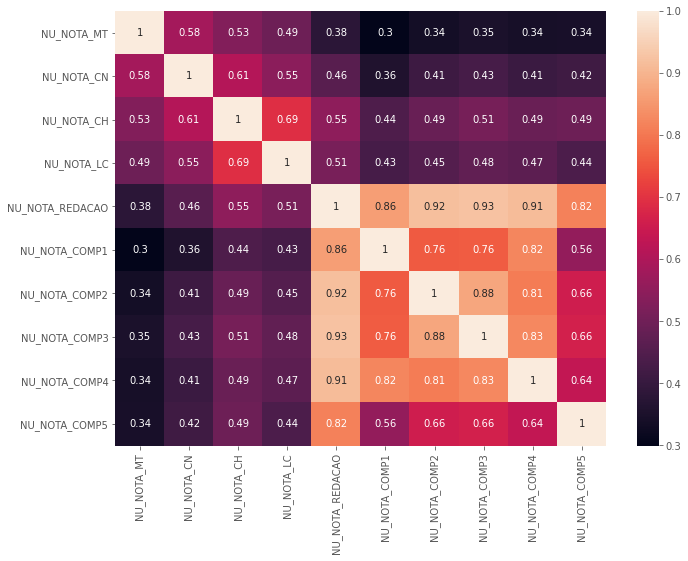

In [294]:
corr = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

Analisando os resultados, obtei pelas 3 notas:
- NU_NOTA_CN
- NU_NOTA_CH
- NU_NOTA_LC

## Analisando a distribuição dos dados a partir de alguns gráficos

Com a função fillna(0) iremos preencher todos os valores NaN por um outro específicoe e nesse caso será pelo zero.

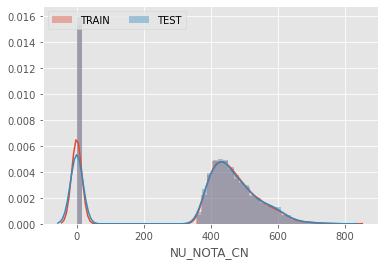

In [295]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

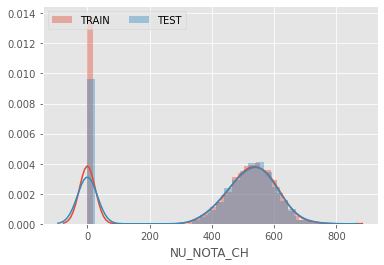

In [296]:
x0 = df_train['NU_NOTA_CH'].fillna(0)
x1 = df_test['NU_NOTA_CH'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

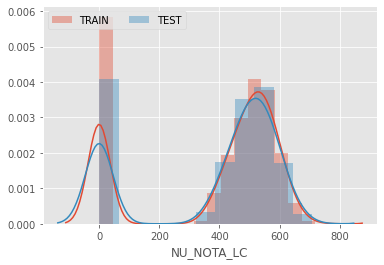

In [297]:
x0 = df_train['NU_NOTA_LC'].fillna(0)
x1 = df_test['NU_NOTA_LC'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

## Alterando as notas nulas do treino

Optei por remover as notas nulas do dataset de treino e aplicar o valor de zero para as notas de redação nulas

In [0]:
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

## Verificando a presença do aluno no dia da prova de matemática

As provas do ENEM 2016 foram separadas em dois dias, sendo que foram usados dois cadernos, um para cada dia. Sabendo disso e de que a nota que estamos tentando estimar é a nota de Matemática, iremos analisar a coluna‘TP_PRESENCA_LC’ a qual irá nos informar a presença ou não do aluno na prova.

Sabemos que se o aluno estava presente em “Linguagens, Códigos e suas Tecnologias", também estará em Matemática, pois são realizados no mesmo dia. Assumirei todas aquelas inscrições que não estiveram presentes como nota zero em Matemática. Para a composição da nota nula de redação, também vou aplicar o valor 0.

Selecionando somente valores diferentes de 0 e não nulos na base de test:

In [0]:
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]

## Verificando novamente a quantidade de notas ‘nulls’ na base de test

In [300]:
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

## Zerando os campos nulos da redação:

In [301]:
df_test['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Criando o modelo de regressão

Primeiro iremos atribuir y_train ao meu target (NU_NOTA_MT'), depois setar x_train com as colunas selecionadas e então normalizar os dados

In [0]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]

Usaremos sklearn.preprocessing.StandardScaler para normalizar/padronizar (mean = 0 e standard deviation = 1) seus recursos antes de aplicar técnicas de aprendizado de máquina. A idéia por trás de StandardScaler é que ele transformará seus dados de tal forma que sua distribuição terá um valor médio 0 e um desvio padrão de 1. Dada a distribuição dos dados, cada valor no conjunto de dados terá o valor médio da amostra. subtraído e, em seguida, dividido pelo desvio padrão de todo o conjunto de dados.

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

O modelo para fazer a regressão será o RandomForestRegressor.

Floresta Aleatória (Random Forest) é um algoritmo de aprendizagem de máquina supervisionado. Ele cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e mais estável.

- 'mae': o erro médio absoluto (MAE) é uma medida da diferença entre duas variáveis contínuas.
- max_depth refere-se à profundidade máxima da árvore.
- min_samples_leaf: o número mínimo de amostras necessárias para estar em um nó folha.
- min_samples_split: o número mínimo de amostras necessárias para dividir um nó interno
- n_estimators: o número de árvores na floresta.
- n_jobs: O número de tarefas a serem executadas em paralelo. Onde -1 significa usar todos os processadores.

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', #erro médio absoluto
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

Fitting um modelo significa encontrar um padrão nos dados. Vamos então treinar o nosso modelo:

In [305]:
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Depois de treinarmos o modelo, podemos usar o modelo treinado para fazer previsões no nosso conjunto de teste, o que fazemos utilizando a função predict(). A função predict() retorna uma matriz de previsões para cada instância de dados no conjunto de testes. Realizando a predição das notas da nossa base test: 

In [0]:
y_pred_test = regressor.predict(x_test)

## Visualizando as previsões:

In [307]:
print(y_pred_test)
print('Tamanho: {}'.format(y_pred_test.size))

[417.6684 442.114  591.9343 ... 470.5929 696.6326 445.5773]
Tamanho: 3286


In [308]:
y_pred_test

array([417.6684, 442.114 , 591.9343, ..., 470.5929, 696.6326, 445.5773])

Arredondando uniformemente para o número especificado de casas decimais, nesse caso duas:

In [309]:
np.around(y_pred_test,2)

array([417.67, 442.11, 591.93, ..., 470.59, 696.63, 445.58])

Atribuindo a previsão ao meu DataFrame

In [0]:
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [311]:
df_resposta['NU_NOTA_MT'] = pd.DataFrame(data=np.around(y_pred_test,2))
df_resposta

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,417.67
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.11
2,b38a03232f43b11c9d0788abaf060f7366053b6d,591.93
4,715494628a50142ce8cb17191cfe6d0f3cae0934,467.08
5,e656d6bad65c93fb2880f1eba5037008c8e75774,520.27
...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,NaN
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,NaN
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,NaN
4573,655fa6306720ff16e825903b5422a46608a77545,NaN


No desafio foi requisitado o seguinte: Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT. Dessa forma, usaremos uma operação de agrupamento.

Uma operação de agrupamento envolve alguma combinação de divisão do objeto, aplicação de uma função e combinação dos resultados. Nesse caso iremos usar o groupby para agrupar nossos resultados

In [312]:
df_resposta.groupby('NU_NOTA_MT').size()

NU_NOTA_MT
397.73    1
400.96    1
401.71    1
403.17    1
403.22    1
         ..
786.82    1
836.62    1
855.33    1
859.19    1
859.22    1
Length: 2160, dtype: int64

Uma tabela de hash é uma estrutura que pode mapear chaves para valores. Usaremos unique() onde os itens serão retornados em ordem de aparência (isso NÃO classifica):

In [313]:
df_resposta['NU_NOTA_MT'].unique()

array([417.67, 442.11, 591.93, ..., 696.63, 445.58,    nan])

Iremos converter o conjunto em um formato CSV para em seguida ser baixado

In [0]:
df_resposta.to_csv('answer.csv', index=False, header=True)

In [0]:
with open('answer.csv','w',newline='\n') as f:
    f.write(df_resposta.to_csv(line_terminator=None))

Retorna um  writer object responsável por converter os dados em strings delimitadas sobre o objeto do arquivo